<center > <font size='5'> <b> 21AIE204 MATHEMATICS FOR INTELLIGENT SYSTEMS 3 <b>  </font> <center>

<center>  <font size='4'> <b> Kernel Methods and its application  <font> <center>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import plotly.express as px
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_moons
from scipy import exp
from scipy.linalg import eigh
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

### 1. Linear Kernel

In [2]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

In [3]:
def apply_linear_kernel(X,Y=None):
    
    if Y is None:
        Y = X
        
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            kernel_matrix[i,j] = linear_kernel(X[i], Y[j])
    return kernel_matrix

### 2. Polynomial Kernel

In [4]:
def polynomial_kernel(x1, x2, degree, offset):
    return (offset + np.dot(x1, x2)) ** degree

In [5]:
def apply_polynomial_kernel(X, Y=None, degree=3, offset=1):
    
    if Y is None:
        Y = X
        
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            kernel_matrix[i,j] = polynomial_kernel(X[i], Y[j], degree,offset)
    return kernel_matrix

### 3. RBF Kernel

In [6]:
def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * (np.linalg.norm(x1 - x2) ** 2))

In [7]:
def apply_rbf_kernel(X, Y=None, gamma=None):
    
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1 / X.shape[1]
        
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            kernel_matrix[i,j] = rbf_kernel(X[i], Y[j], gamma)
    return kernel_matrix

### 4. Laplacian Kernel

In [8]:
def laplacian_kernel(x1, x2, sigma):
    return np.exp(-sigma * np.linalg.norm(x1 - x2, 1))

In [9]:
def apply_laplace_kernel(X,Y=None, sigma=None):
    
    if Y is None:
        Y = X
    if sigma is None:
        sigma = 1
    
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            kernel_matrix[i,j] = laplacian_kernel(X[i], Y[j], sigma)
    return kernel_matrix

### 5. Sigmoid Kernel

In [10]:
def sigmoid_kernel(x1, x2, alpha, beta):
    return np.tanh(alpha * np.dot(x1, x2) + beta)

In [11]:
def apply_sigmoid_kernel(X, Y=None, alpha=1, beta=1):
    
    if Y is None:
        Y = X
        
    kernel_matrix = np.zeros((X.shape[0], Y.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            kernel_matrix[i,j] = sigmoid_kernel(X[i], Y[j], alpha, beta)
    return kernel_matrix

## Applications of Kernel Function

### 1. Classification using Support Vector Machine

<b> Create a Non-linear Dataset for Classification <b>

In [12]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [13]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

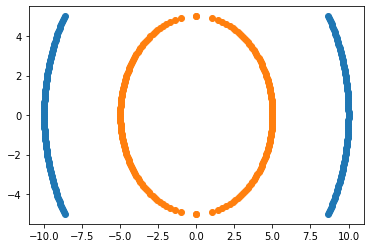

In [14]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [15]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)

In [16]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1


In [17]:
X = df.iloc[:, :2]  
y = df.Y

In [18]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Apply Kernel functions to non-linearly separable Dataset

### Linear Kernel

In [21]:
K_linear = apply_linear_kernel(X)

<b> Dataset visualization after applying linear kernel <b>

In [23]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=K_linear.sum(1),
              color=y)
fig.show()

In [24]:
K_train_linear = apply_linear_kernel(X_train)

In [25]:
K_test_linear = apply_linear_kernel(X_test, X_train)

In [26]:
clf_linear = SVC(kernel='precomputed')

In [27]:
clf_linear.fit(K_train_linear,y_train)

SVC(kernel='precomputed')

In [28]:
y_pred = clf_linear.predict(K_test_linear)

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [30]:
print("The accuracy when linear kernel is applied to the datset is ",accuracy_score(y_pred,y_test)*100)

The accuracy when linear kernel is applied to the datset is  47.5


### Polynomial Kernel 

In [31]:
K_poly = apply_polynomial_kernel(X)

<b> Dataset visualization after applying polynomial kernel <b>

In [33]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=K_poly.sum(1),
              color=y)
fig.show()

In [34]:
K_train_poly = apply_polynomial_kernel(X_train)

In [35]:
K_test_poly = apply_polynomial_kernel(X_test, X_train)

In [36]:
clf_poly = SVC(kernel='precomputed')

In [37]:
clf_poly.fit(K_train_poly,y_train)

SVC(kernel='precomputed')

In [38]:
y_pred_poly = clf_poly.predict(K_test_poly)

In [39]:
print("The accuracy when linear kernel is applied to the datset is ",accuracy_score(y_pred_poly,y_test)*100)

The accuracy when linear kernel is applied to the datset is  100.0


### RBF Kernel

In [40]:
K_rbf = apply_rbf_kernel(X,X,0.001)

<b> Dataset visualization after applying  kernel <b>

In [42]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=K_rbf.sum(1),
              color=y)
fig.show()

In [43]:
K_train_rbf = apply_rbf_kernel(X_train)

In [44]:
K_test_rbf = apply_rbf_kernel(X_test, X_train)

In [45]:
clf_rbf = SVC(kernel='precomputed')

In [46]:
clf_rbf.fit(K_train_rbf,y_train)

SVC(kernel='precomputed')

In [47]:
y_pred_rbf = clf_poly.predict(K_test_rbf)

In [48]:
print("The accuracy when linear kernel is applied to the datset is ",accuracy_score(y_pred_poly,y_test)*100)

The accuracy when linear kernel is applied to the datset is  100.0


### Laplacian Kernel

In [49]:
K_laplace = apply_laplace_kernel(X,X,0.01)

<b> Dataset visualization after applying Laplacian kernel <b>

In [50]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=K_laplace.sum(1),
              color=y)
fig.show()

In [51]:
K_train_laplace = apply_laplace_kernel(X_train)

In [52]:
K_test_laplace = apply_laplace_kernel(X_test, X_train)

In [53]:
clf_laplace = SVC(kernel='precomputed')

In [54]:
clf_laplace.fit(K_train_laplace,y_train)

SVC(kernel='precomputed')

In [55]:
y_pred_laplace = clf_laplace.predict(K_test_laplace)

In [56]:
print("The accuracy when linear kernel is applied to the datset is ",accuracy_score(y_pred_laplace,y_test)*100)

The accuracy when linear kernel is applied to the datset is  100.0


### Sigmoid Kernel

In [57]:
K_sigmoid = apply_sigmoid_kernel(X,X,0.5,1)

In [58]:
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=K_sigmoid.sum(1),
              color=y)
fig.show()

In [59]:
K_train_sigmoid = apply_sigmoid_kernel(X_train)

In [60]:
K_test_sigmoid = apply_sigmoid_kernel(X_test, X_train)

In [61]:
clf_sigmoid = SVC(kernel='precomputed')

In [62]:
clf_sigmoid.fit(K_train_sigmoid,y_train)

SVC(kernel='precomputed')

In [63]:
y_pred_sigmoid = clf_sigmoid.predict(K_test_sigmoid)

In [64]:
print("The accuracy when linear kernel is applied to the datset is ",accuracy_score(y_pred_sigmoid,y_test)*100)

The accuracy when linear kernel is applied to the datset is  53.75


### 2. Kernel Principle Component Analysis (KPCA) for Classification

<b> Creating a random non-linear dataset <b>

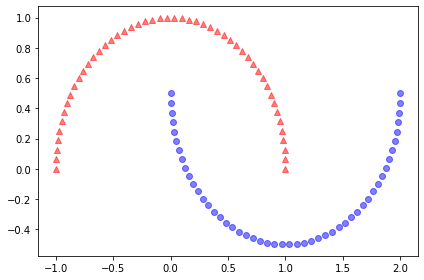

In [65]:
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

<b> Applying PCA for the dataset <b>

In [66]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

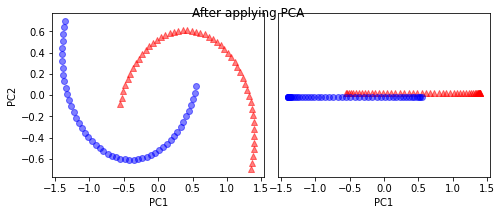

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
fig.suptitle("After applying PCA")
plt.show()

<b> PCA with RBF Kernel <b>

In [68]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean') 
    mat_sq_dists = squareform(sq_dists)    
    K = exp(-gamma * mat_sq_dists)    
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]    
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])    
    return X_pc

In [69]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

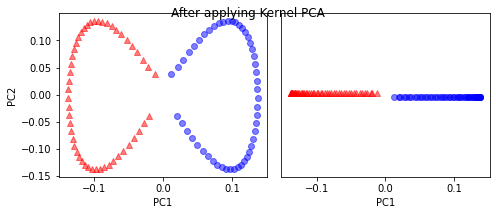

In [70]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
ig.suptitle("After applying Kernel PCA")
plt.show()

<b> PCA with Linear Kernel <b>

In [73]:
def linear_kernel_pca(X, n_components):
    N = X.shape[0]
    K = X.dot(X.T)
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    return X_pc

In [74]:
linear_kpca = linear_kernel_pca(X,n_components=2)

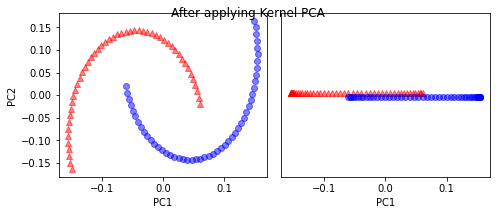

In [80]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(linear_kpca[y==0, 0], linear_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(linear_kpca[y==1, 0], linear_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(linear_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(linear_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
ig.suptitle("After applying Kernel PCA")
plt.show()

<b> PCA with Polynomial Kernel <b>

In [77]:
def polynomial_kernel_pca(X, degree, n_components):
    N = X.shape[0]
    K = (X.dot(X.T) + 1)**degree
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    return X_pc

In [91]:
poly_kpca = polynomial_kernel_pca(X,degree=3,n_components=2)

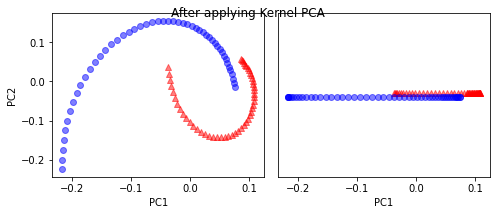

In [92]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(poly_kpca[y==0, 0], poly_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(poly_kpca[y==1, 0], poly_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(poly_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(poly_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
ig.suptitle("After applying Kernel PCA")
plt.show()

<b> PCA with Laplacian Kernel <b>

In [93]:
def laplacian_kernel_pca(X, sigma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-mat_sq_dists / (2 * sigma**2))
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    return X_pc

In [83]:
lap_kpca = laplacian_kernel_pca(X,sigma=0.01,n_components=2)

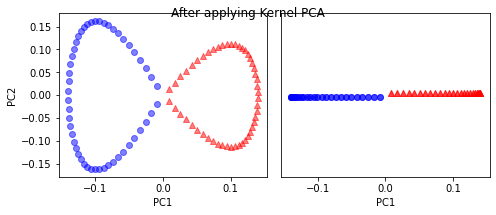

In [84]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(lap_kpca[y==0, 0], lap_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(lap_kpca[y==1, 0], lap_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(lap_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(lap_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
ig.suptitle("After applying Kernel PCA")
plt.show()

<b> PCA with Sigmoid Kernel <b>

In [88]:
def sigmoid_kernel_pca(X, alpha, beta, n_components):
    N = X.shape[0]
    K = np.tanh(alpha * X.dot(X.T) + beta)
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    return X_pc

In [89]:
sigmoid_kpca = sigmoid_kernel_pca(X, alpha=0.1, beta=0.1, n_components=2)

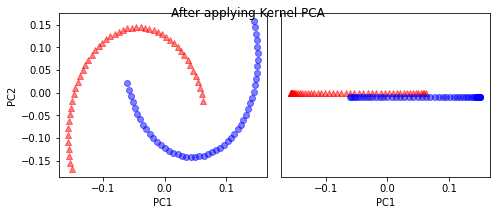

In [90]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(sigmoid_kpca[y==0, 0], sigmoid_kpca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(sigmoid_kpca[y==1, 0], sigmoid_kpca[y==1, 1],color='blue', marker='o', alpha=0.5)
ax[1].scatter(sigmoid_kpca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(sigmoid_kpca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
ig.suptitle("After applying Kernel PCA")
plt.show()